# Занятие 13. Методы компьютерного зрения. Свёрточные нейронные сети
![Баннер](https://www.vitec.ru/upload/iblock/ab4/ab4a5b7608210c6ce1772d41c9dc50d2.png)

Когда речь заходит о по-настоящему интеллектуальных машинах (или вообще о каком-нибудь искусственном разуме в вакууме), представляется, что эти машины способны `воспринимать информацию` об окружающей среде, и прежде всего, воспринимать посредством механизма зрения. И это не удивляет, поскольку человек через глаза как орган восприятия получает до 80% всей информации.

`Компьютерное зрение` — это область искусственного интеллекта, занимающаяся разработкой алгоритмов и систем, которые позволяют компьютерам "видеть", анализировать и понимать визуальную информацию из окружающего мира. По сути, задача компьютерного зрения заключается в том, чтобы дать машинам возможность воспринимать изображения и видео так же, как это делает человек.

## Основы работы компьютерного зрения
### Принципы обработки изображений и извлечение признаков
Почему научить машины видеть так сложно, если человек делает это, не задумываясь? Ответ заключается в том, что восприятие в основном происходит за пределами нашего сознания, внутри специализированных зрительных (и других чувственных модулей) в нашем мозге. К тому времени, когда чувстенная информация достигает нашего сознания, она уже оснащена высокоуровными признаками. Например, глядя на фотографию забавного щенка, вы не в состоянии сделать выбор `не` видеть щенка или `не` заметить, что он забавный. Вы также не можете объяснить, `как` вы распознали забавного щенка $-$ для вас же это просто очевидно. Таким образом, мы не можем доверять своему субъективному опыту: восприятие вообще не является тривиальным и для его понимания мы должны посмотреть, как работают чувственные модули.

В отличие от человека, компьютер не сможет идентифицировать объект перед собой без исходных данных и не умеет отделять важное от неважного. Для него цветное изображение похоже на мешочки с цифрами: он «видит» набор пикселей, где каждый пиксель — это три числа, обозначающие количество красного, зелёного и синего по цветовой модели RGB (в случае чёрно-белых изображений — одно число, `интенсивность пикселя`). Пиксель зелёного цвета может относиться к траве или дому такого же оттенка, но увидеть более полную картину компьютеру не под силу.

Встаёт вопрос: как "готовить" изображения для обучения компьютера? Рассмотрим основные принципы обработки изображений. Все примеры будут использовать библиотеку `OpenCV`, которая стала признанным стандартом в области обработки изображений.

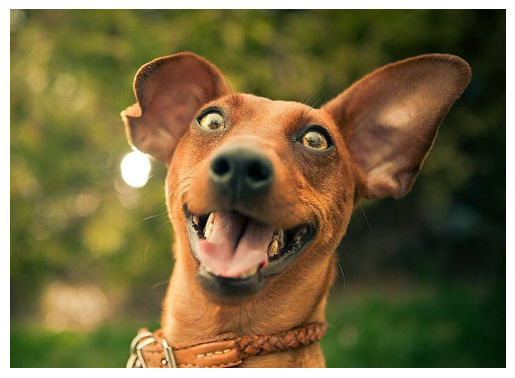

In [12]:
# возьмём картинку в качестве примера
import cv2
import matplotlib.pyplot as plt

# чтение изображения
image = cv2.imread('example.jpg')

# по-дефолту opencv читает изображения в формате BGR,
# поэтому преобразуем в цветовую схему RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# отображение изображения
plt.imshow(image)
plt.axis('off')
plt.show();

Что же представляет собой изображение в компьютере вообще и в python для библиотек работы с изображениями в частности? Это знакомый вам массив `numpy.ndarray`.

In [13]:
print(f"Тип данных: {type(image)}")
print(f"Количество измерений: {image.ndim}")
print(f"Форма массива: {image.shape}")

Тип данных: <class 'numpy.ndarray'>
Количество измерений: 3
Форма массива: (506, 700, 3)


Откуда берётся такая форма массива, почему в форме массива присутствует 3? Всё очень просто: массив этого изображения трёхмерный, первые два числа $-$ это ширина и высота изображения (оси $x$ и $y$), а третье число (третья ось, $z$) $-$ это количество цветов в кодировке изображения.

![Текст ссылки](https://habrastorage.org/webt/gz/rx/7q/gzrx7qp8p_kzdeb2cat-raur3sk.png)

Третья ось придаёт объём. Обратите внимание на рисунок выше: по сути, изображение в кодировке RGB (и в любых других кодировках) $-$ это наложение отдельных матриц, или цветовых `каналов`. В случае кодировки RGB это матрицы красного, зелёного и синего цвета. Мы можем отобразить нашу картинку в оттенках каждого из трёх цветов.



array([[[144, 138,  90],
        [144, 138,  90],
        [144, 138,  88],
        ...,
        [ 13,  20,   2],
        [ 14,  21,   5],
        [ 14,  21,   5]],

       [[147, 141,  93],
        [146, 140,  92],
        [145, 139,  89],
        ...,
        [ 13,  20,   2],
        [ 14,  21,   5],
        [ 15,  22,   6]],

       [[152, 144,  97],
        [151, 143,  96],
        [149, 141,  92],
        ...,
        [ 14,  21,   3],
        [ 15,  22,   6],
        [ 16,  23,   7]],

       ...,

       [[ 36,  74,  17],
        [ 36,  74,  17],
        [ 37,  75,  18],
        ...,
        [  6,  30,   8],
        [  6,  30,   8],
        [  6,  30,   8]],

       [[ 33,  71,  14],
        [ 33,  71,  14],
        [ 34,  72,  15],
        ...,
        [  5,  29,   7],
        [  5,  29,   7],
        [  5,  29,   7]],

       [[ 33,  71,  14],
        [ 33,  71,  14],
        [ 34,  72,  15],
        ...,
        [  5,  29,   7],
        [  5,  29,   7],
        [  5,  29,   7]]], dtype=uint8)
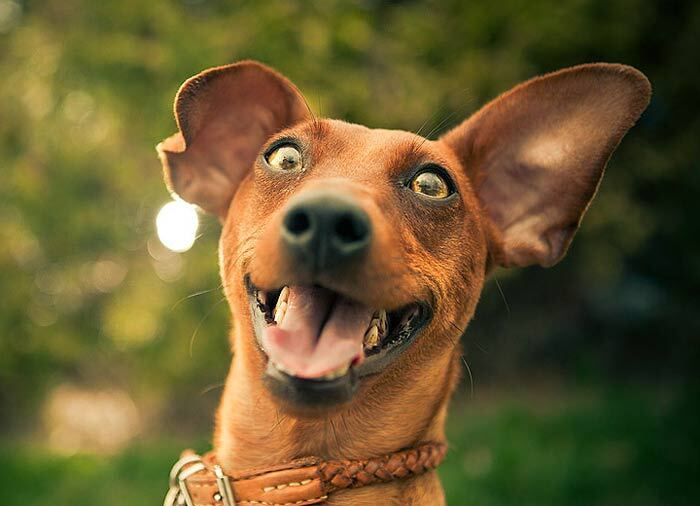

In [14]:
# массив в исходном виде
# каждый подмассив из трёх чисел - отдельный пиксель
image

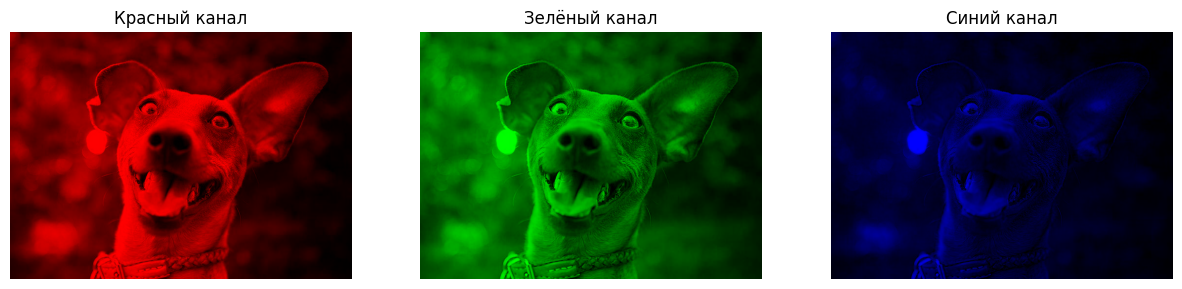

In [15]:
import numpy as np

# разделение каналов
r, g, b = cv2.split(image)

# создаем пустые массивы для остальных каналов
zeros = np.zeros(r.shape, dtype=r.dtype)

# объединяем массивы для отображения отдельных цветовых каналов
red_channel = cv2.merge([r, zeros, zeros])   # только красный канал
green_channel = cv2.merge([zeros, g, zeros]) # только зеленый канал
blue_channel = cv2.merge([zeros, zeros, b])  # только синий канал

# Отображение отдельных цветовых каналов
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(red_channel)
plt.axis('off')
plt.title('Красный канал')

plt.subplot(1, 3, 2)
plt.imshow(green_channel)
plt.axis('off')
plt.title('Зелёный канал')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel)
plt.axis('off')
plt.title('Синий канал')

plt.show();


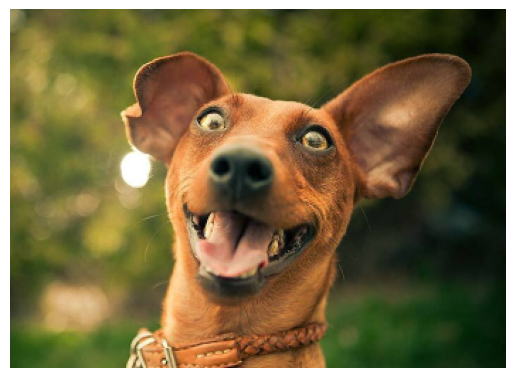

In [16]:
# можно менять размер изображения
img_width, img_height, _ = image.shape
plt.imshow(cv2.resize(image, (img_height // 2, img_width // 2)))
plt.axis('off')
plt.show()

По сути, работа с `неструктурированными` данными (то есть с данными, у которых нет чёткой табличной структуры) $-$ это всегда конструирование и извлечение признаков, даже ещё больше, чем при работе со струкутрированными данными.

Один из способов преобразовывать картинки для повышения качества $-$ использовать `фильтры`.

Концепция фильтров особенно знакома тем, кто работал с Photoshop для повышения качества картинки. Просто перечислю некоторые из часто используемых фильтров: размытие, повышение резкости, нахождение краев, тиснение и прочие.

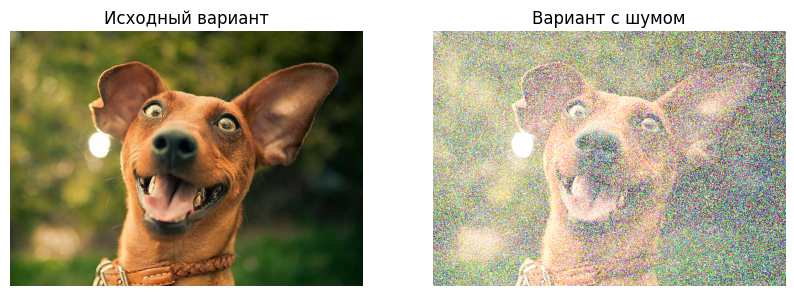

In [18]:
# добавим гауссовский шум (случайный шум из нормального распределения)
mean = 0 # cреднее значение гауссовского шума
sigma = 25 # cтандартное отклонение гауссовского шума
gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, gaussian_noise)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Исходный вариант')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.axis('off')
plt.title('Вариант с шумом')

plt.show();

Как видите, изображение стало менее чётким. Попробуем избавиться от этого "шума" с помощью фильтров размытия.

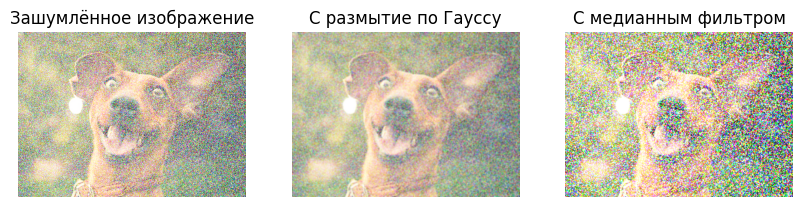

In [20]:
# одни из известных фильтров - размытие по Гауссу и медианный фильтр
gaussian_image = cv2.GaussianBlur(noisy_image,(7,7),0)
median_image = cv2.medianBlur(noisy_image, 3)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image)
plt.axis('off')
plt.title('Зашумлённое изображение')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_image)
plt.axis('off')
plt.title('С размытие по Гауссу')

plt.subplot(1, 3, 3)
plt.imshow(median_image)
plt.axis('off')
plt.title('С медианным фильтром')

plt.show();

Как видим, с гауссовским шумом лучше всего справилось размытие по Гауссу, но это только в этом случае. Как правило, выбор фильтра $-$ это эмпирическая задача.

Как же работают эти фильтры? Фильтры, которые были перечислены, а так же множество других основаны на свертке. Свертка (англ. `convolution`) — это операция, показывающая «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на группах, а также мер. Несколько сложноватое определение, не так ли?

Если говорить проще, то `свертка` – это операция вычисления нового значения выбранного пикселя, учитывающая значения окружающих его пикселей. Для вычисления значения используется матрица, называемая `ядром свертки`. Обычно ядро свертки является квадратной матрицей $N\times N$, где $N$ — нечетное, однако ничто не мешает сделать матрицу прямоугольной. Во время вычисления нового значения выбранного пикселя ядро свертки как бы «прикладывается» своим центром (именно тут важна нечетность размера матрицы) к данному пикселю. Окружающие пиксели так же накрываются ядром. Далее высчитывается сумма, где слагаемыми являются произведения значений пикселей на значения ячейки ядра, накрывшей данный пиксель. Сумма делится на сумму всех элементов ядра свертки. Полученное значение как раз и является новым значением выбранного пикселя. Если применить свертку к каждому пикселю изображения, то в результате получится некий эффект, зависящий от выбранного ядра свертки.

![Текст ссылки](https://vscode.ru/wp-content/uploads/2015/04/theconvolutionkernel.png)

Вместо суммы можно использовать любую другую функцию. Например, в медианном фильтре среди всех чисел (значений цветовой интенсивности пикселя) выбирается медианное и присваивается выбранному пикселю.

Многие фильтры можно найти в документации к библиотеке `opencv`.

Идея свёртки помогает не только трансформировать исходное изображение, но и помогает выделять новые признаки. Иногда нас могут интересовать только контуры объектов на изображении, а не все его пиксели. Тогда можно попробовать использовать фильтр, основанный на ядре Собеля:

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/12.png)

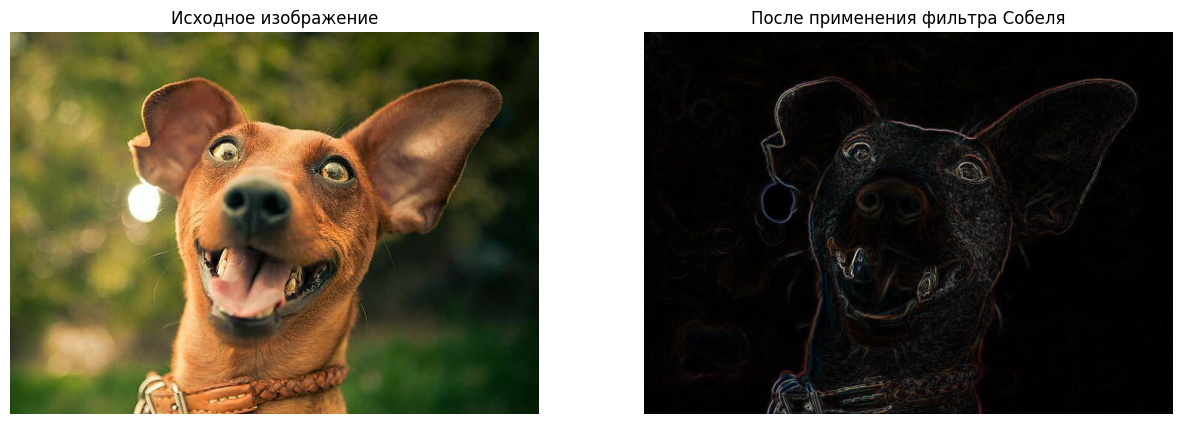

In [22]:
# или, если к нашему изображению применить
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # градиент по X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # градиент по Y

# вычисление модуля градиента
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# нормализуем для отображения (в оттенках чёрно-белого, от 0 до 255)
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)
sobel_magnitude = np.uint8(sobel_magnitude)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Исходное изображение')

plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')
plt.title('После применения фильтра Собеля')

plt.show();

Часто используется операция `бинаризации` изображения.

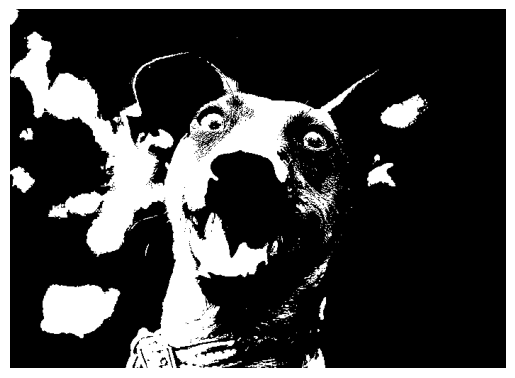

In [23]:
# для бинаризации изображение должно быть в оттенках серого
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# применение пороговой обработки для отсеивания пикселей ниже некоторого значения
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show();

Если вы решаете задачу компьютерного зрения с помощью традиционных методов (моделей семейства регрессии, деревьев и лесов), то можете использовать два алгоритма, которые позволят выделить полезные признаки для них.

`SIFT (Scale-Invariant Feature Transform)` — это популярный алгоритмы для извлечения ключевых точек и описания их признаков в изображениях. Они используются в задачах, таких как распознавание объектов, сшивание изображений и отслеживание движущихся объектов.

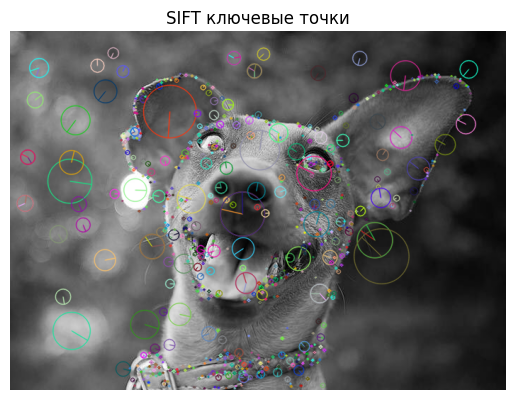

In [26]:
# нас не интересуют цвета, только ключевые точки
# поэтому загружаем в цветах серого
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()

# поиск ключевых точек и вычисление описателей
keypoints, descriptors = sift.detectAndCompute(image, None)

# отрисовка ключевых точек на изображении
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image_with_keypoints, cmap='gray')
plt.title('SIFT ключевые точки')
plt.axis('off')
plt.show();

### Задачи компьютерного зрения
Можно выделить четыре основных задачи, для которых используют приёмы компьютерного зрения.

1. **Классификация**. Когда объекту присваивается определённый класс. Простыми словами, машина определяет его в одну из групп, которые она знает: человек, чемодан, скамейка.

2. Задача **локализации** $-$ задача определения точного местоположения объекта на картинке.

3. Задача **обнаружения**. Суть задачи в том, чтобы определить класс объекта на фото и указать его (объекта) местоположение.

4. Задача **сегментации**, которая делится на два вида. Первый — `семантическая сегментация`, которая отделяет изображения от фона и позволяет накладывать на них маски. Ей удастся разделить объекты на классы и выделить масками разного цвета: котов — красной, а собак — зелёной. Другой пример — размытый фон позади человека. На шаг впереди `сегментация объектов`. Котов и собак она распределит по классам, но вдобавок покажет, что они отличаются, и выделит их как разные объекты: собака № 1 и собака № 2.

![Текст ссылки](https://avatars.mds.yandex.net/get-lpc/1520633/e10e6305-c366-4f02-a4c8-98a36a3355f8/width_1280_q70)

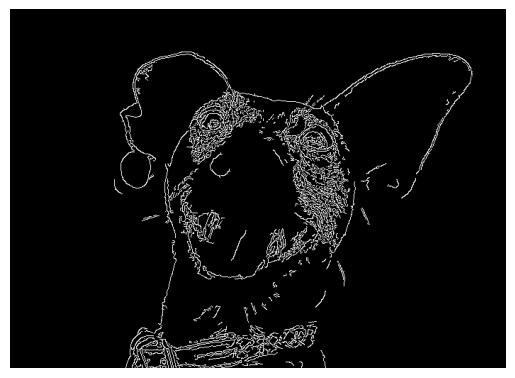

In [24]:
# пример семантической сегментации
# на основе детектора краев Canny
edges = cv2.Canny(gray_image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show();

## Свёрточные нейронные сети
В 1958 и 1959 годах исследователи Дэвид Х. Хьюбел и Торстен Визель провели серию экспериментов на кошках и даже обезьянах и выявили важнейшие сведения о структуре зрительной коры головного мозга. В частности, они показали, что многие нейроны в зрительной коре головного мозга имеют маленькое `локальное рецепторное поле`, поэтому реагируют только на зрительные раздражители, находящиеся в определённой ограниченной области поля зрения. Поля разных нейронов могут перекрываться и вместе они охватывают все поле зрения.


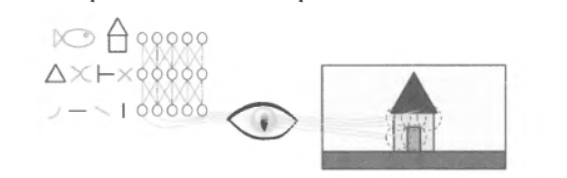


Эти наблюдения привели к мысли, что нейроны более высокого уровня (реагируют на более сложные образы) основываются на выходах соседствующих нейронов более низкого уровня (реагируют на более простые признаки).

Проведённые исследования зрительной коры вдохновили на создание `свёрточных нейронных сетей`. Эта архитектура содержит ряд строительных блоков, которые вам уже известны, в том числе полносвязные слои и сигмоидальные функции активации, но она также представляет два новых строительных блока: `свёрточные слои` (`convolutional layer`) и `объединяющие слои` (`pooling layer`).

### Свёрточные слои
Самый важный стоительный блок свёрточной нейронной сети $-$ это `свёрточный слой`: нейроны в первом свёрточном слое связаны не с каждым одиночным пикселем, как это было в случае полносвязных персептронов, а только с пикселями в собственных рецепторных полях. В свою очередь каждый нейрон во втором свёрточном слое связан с нейронами, находящимися внутри небольшого прямоугольника в первом слое.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/1.gif)

Такая архитектура позволяет сосредоточиться на маленьких никоуровныевых признаках в первом скрытом слое, а затем скомпоновать их в более крупные высокоуровневые признаки в следующем скрытом слое и т. д.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/17.png)

Такой подход контрастирует с полносвязными сетями. Так, в приведенном выше примере имеется 5×5=25 входных признаков и 3×3=9 выходных. Если бы это были два полносвязных слоя, весовая матрица состояла бы из 25×9=225 весовых параметров. При этом каждая функция вывода была бы взвешенной суммой всех входов. В случае свертки, взвешенная сумма берется только по числу весов ядра. И в рассмотрении одновременно участвуют только близлежащие элементы.

В вышеприведенном примере скольжение ядра «обрезает» исходный двумерный массив по краю, преобразуя матрицу 5×5 в 3×3. Краевые пиксели теряются из-за того, что ядро не может распространяться за пределы края. Однако иногда необходимо, чтобы размер выходного массива был тем же, что и у входных данных.

Чтобы решить эту задачу, исходный массив можно дополнить «поддельными» пикселями. Например, в виде краевого поля, окружающего массив. Если в качестве значений берутся нули, говорят о `«нулевом отступе»` (`zero padding`).

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/3.gif)

Вышеприведенные диаграммы соответствуют лишь изображениям с одним входным каналом. На практике большинство изображений имеют три канала: красный, зеленый и синий.

В случае с одним каналом термины фильтр и ядро взаимозаменяемы. Для цветного изображения они различны. Фильтр – это коллекция ядер, каждое из которых соответствует одному каналу. Ядро фильтра скользит по данным канала, создавая их обработанную версию. Значимость ядер определяется взаимным отношением их весов. Например, ядро для красного канала может быть более значимым в модели, чем другие ядра фильтра, тогда будут больше и соответствующие веса.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/7.gif)

Каждая из обработанных в своих каналах версий суммируется для формирования общего канала.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/8.gif)

В выходном терминале может присутствовать линейное смещение, независимое от функций каждого из ядер и свойственное лишь выходному каналу.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/9.gif)



### Объединяющие слои
Разобравшись в том, как работают свёрточные слои, понять назначение объединяющих слоёв довольно легко. Их цель заключается в том, чтобы проредить входное изображение для сокращения вычислительной нагрузки, расхода памяти и количества параметров (тем самым сократить риск переобучения).

Как и в свёрточных слоях, каждый нейрон в объединяющем слое связан с выходами ограниченного числа нейронов из предыдущего слоя, которые расположены внутри небольшого прямоугольного рецепторного поля. При этом объединяющий нейрон не имеет весов, он лишь агрегирует входы с применением функции агрегирования: среднее значение, максимальное или минимальное значение и т.д.

![Текст ссылки](https://media.proglib.io/wp-uploads/2018/06/4.gif)

### Архитектуры свёрточных нейронных сетей
Типовая архитектура свёрточной нейронной сети укладывает стопкой несколько свёрточных слоёв (за каждым из которых следует слой ReLU), объединяющий слой и т. д. По мере прохождения через сеть изображение становится всё меньше и меньше, но обычно также и глубже и глубже. На верхушку добавляется обычная полносвязная сеть и финальный слой выпускает прогноз (в зависимости от задачи).

![Текст ссылки](https://habrastorage.org/r/w1560/getpro/habr/post_images/473/0c4/7f8/4730c47f8ed2a86daa40356e88cc7dbd.png)

## Задача обнаружения
Как говорилось в предыдущей лекции, установление местонахождения объекта на фотографии может быть выражено в виде задачи регрессии: распространённый подход к прогнозированию ограничивающей рамки вокруг объекта заключается в том, чтобы прогнозировать горизонтальные и вертикальные координаты центра объекта, а также его ширину и высоту.

Однако есть проблемы. Как правило, наборы данных с изображениями не имеют ограничвающих рамок вокруг объектов. Следовательно, нужно добавлять их самостоятельно. Получение меток часто оказывается одним из самых трудных и дорогостоящих частей проекта по машинному обучению. Имеет смысл потратить какое-то время на поиск подходящих инструментов.

Предположим, что вы получили ограничивающие рамки для всех изображений цветков в наборе данных. Далее понадобится создать набор данных, элементы которого будут пакетами предварительно обработанных изображений наряду с метками классов и их ограничивающими рамками. Каждый элемент должен быть кортежем формы (images, (class_labels, bounding_boxes)). После этого всё готово для обучения модели.

Потеря `MSE` неплохо работает в качестве функции издержек при обучении модели, но она не является выдающимся показателем для оценки, насколько хорошо модель способна прогнозировать ограничивающие рамки. Самым распространённым показателем для такой цели служит `пересечение по объединению`: площадь перекрытия между спрогнозированной ограничивающей рамкой и целевой ограничивающей рамкой, делённая на площадь их объединения.

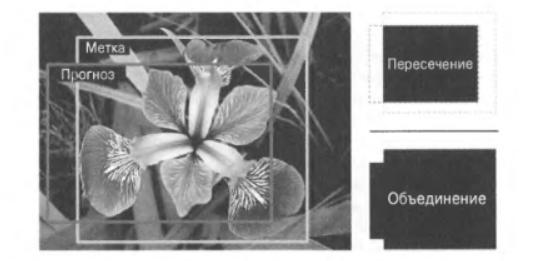

Ещё несколько лет назад обычный подход предусматривал привлечение сверточной сети, обученной классификации и обнаружению местонахождения одиночного объекта, и её плавное продвижение по изображению.

Методика довольно прямолинейна и, как было показано, она будет выявлять тот же самый объект много раз в слегка отличющихся позициях. Затем потребуется заключительная обработка, чтобы избавиться от излишних ограничивающих рамок. Часто используемый подход называется `подавлением немаксимумов`. Вот в чём он заключается:

1. Добавьте к свёрточной сети дополнительный выход `объектности` для оценки вероятности того, что объект действительно присутствует на изображении. Затем избавьтесь от всех ограничивающих рамок, для которых мера объектности ниже определённого порога: это отбросит все ограничивающие рамки, на самом деле не содержащие нужные объект.

2. Найдите ограничивающую рамку с наивысшей мерой объектности и избавьтесь от всех остальных ограничивающих рамок, которые значительно перекрываются с ней.

3. Повторяйте шаг 2 до тех пор, пока больше не останется ограничивающих рамок, от которых нужно избавиться.

Другой подход к выявлению объектов предложил в 2015 году Джозеф Редмон. Он представил архитектуру `YOLO` (`You Only Live Once`, "живём лишь один раз"). В отличие от описанного выше метода, эта архитектура оказалась очень быстрой. Настолько, что оказалась способной работать в реальном времени.

Эта архитектура нейронной сети выдаёт для каждой ячейки пять ограничивающих рамок, и каждая ограничивающая рамка поступает с мерой объектности. Она также выдает для каждой ячейки решётки 20 вероятностей классов, так как обучалась на наборе данных, который содержит 20 классов. В сумме получается 45 чисел на ячейку решётки: 5 ограничивающих рамок, каждая с 4 координатами, 5 мер объектности и 20 вероятностей классов.

Вместо прогнозирования абсолютных координат центров ограничивающих рамок архитектура YOLO прогнозирует смещение относительно координат ячейки решётки, где (0, 0) $-$ левый верхний угол ячейки, а (1, 1) $-$ правый нижний угол. Для каждой ячейки решётки YOLO обучается прогнозированию только ограничивающих рамок, чьи центры находятся в этой ячейке (но сама ограничивающая рамка в общем случае может простираться за пределы ячейки решетки). YOLO применяет к координатам ограничивающих рамок логистическую функцию активации, гарантируя, что они остаюся в диапазоне 0-1.

Перед обучением нейронной сети YOLO ищет пять репрезентативных измерений ограничивающих рамок, которые называются `опорными рамками`. Это делается путём применения алгоритма `K-Means` к высоте и ширине ограничивающих рамок обучающего набора.

Таким образом, получилось с высокой степенью уверенности прогнозировать, что изображение представляет, допустим, собаку, даже если неясно, какой именно породы.

# Упражнения
1. Найти информацию о знаменитых архитектурах свёрточных сетей (LeNet, VGGNet и т. д.).
2. Выполнить практическую работу по применению методики обучения с помощью передачи знаний для классификации повреждений сетчатки по результатам ОКТ-сканирования.
3. Выполнить практическую работу по построению модели обнаружения.